<a href="https://colab.research.google.com/github/s-ajaykumar/Neural_Network_Projects/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!ls

drive  sample_data


In [3]:
%cd drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [7]:
!ls

DataSetPreprocessing_And_Classification_Models.ipynb  Neural-Network-Projects
MNIST.ipynb					      Perceptron.ipynb


In [10]:
!git clone https://github.com/s-ajaykumar/Neural_Network_Projects.git

fatal: destination path 'Neural_Network_Projects' already exists and is not an empty directory.


In [11]:
!git add Perceptron.ipynb

fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


In [6]:
!git add Perceptron.ipynb

fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


In [ ]:
import pylab
from matplotlib import gridspec
from sklearn.datasets import make_classification
import numpy as np
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import pickle
import os
import gzip

# pick the seed for reproducability - change it to explore the effects of random variations
np.random.seed(1)
import random

In [ ]:
n = 50
X, Y = make_classification(n_samples = n, n_features=2,
                           n_redundant=0, n_informative=2, flip_y=0)
Y = Y*2-1 # convert initial 0/1 values into -1/1
X = X.astype(np.float32); Y = Y.astype(np.int32) # features - float, label - int

# Split the dataset into training and test
train_x, test_x = np.split(X, [ n*8//10])
train_labels, test_labels = np.split(Y, [n*8//10])
print("Features:\n",train_x[0:4])
print("Labels:\n",train_labels[0:4])

Features:
 [[-1.7441838  -1.3952037 ]
 [ 2.5921783  -0.08124504]
 [ 0.9218062   0.91789985]
 [-0.8437018  -0.18738253]]
Labels:
 [-1 -1  1 -1]


In [ ]:
pos_samples = np.array([ [t[0], t[1], 1] for i,t in enumerate(train_x)
                          if train_labels[i]>0])
neg_samples = np.array([ [t[0], t[1], 1] for i,t in enumerate(train_x)
                          if train_labels[i]<0])

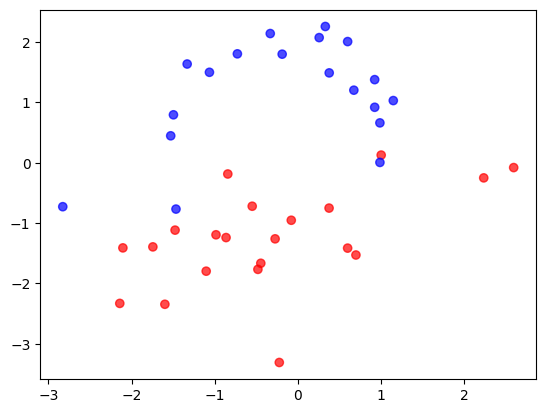

In [ ]:
fig, ax = pylab.subplots(1,1)
colors = ['r' if l < 0 else 'b' for l in train_labels]
ax.scatter(train_x[:,0],train_x[:,1], c=colors, alpha = 0.7)

In [ ]:
def perceptron(pos_samples, neg_samples):
  weights = np.zeros((pos_samples.shape[1], 1))
  for i in range(100):
    pos_sample = random.choice(pos_samples)
    neg_sample = random.choice(neg_samples)
    z = np.dot(pos_sample, weights)
    if z < 0:
      weights = weights + pos_sample.reshape(weights.shape)
    z = np.dot(neg_sample, weights)
    if z >= 0:
      weights = weights - neg_sample.reshape(weights.shape)
    if i % 10 == 0:
      pos_out = np.dot(pos_samples, weights)
      neg_out = np.dot(neg_samples, weights)
      pos_accuracy = (pos_out >= 0).sum() / float(pos_samples.shape[0])
      neg_accuracy = (neg_out < 0).sum() / float(neg_samples.shape[0])
      print("iteration = {} pos_accuracy = {} neg_accuracy = {}".format(i,pos_accuracy,neg_accuracy))
  return weights

In [ ]:
p = perceptron(pos_samples, neg_samples)
print(p.transpose())

iteration = 0 pos_accuracy = 0.10526315789473684 neg_accuracy = 0.9047619047619048
iteration = 10 pos_accuracy = 0.9473684210526315 neg_accuracy = 0.5238095238095238
iteration = 20 pos_accuracy = 0.8421052631578947 neg_accuracy = 1.0
iteration = 30 pos_accuracy = 0.8947368421052632 neg_accuracy = 0.9523809523809523
iteration = 40 pos_accuracy = 0.9473684210526315 neg_accuracy = 0.8571428571428571
iteration = 50 pos_accuracy = 0.9473684210526315 neg_accuracy = 0.8095238095238095
iteration = 60 pos_accuracy = 1.0 neg_accuracy = 0.9047619047619048
iteration = 70 pos_accuracy = 0.9473684210526315 neg_accuracy = 0.9523809523809523
iteration = 80 pos_accuracy = 0.9473684210526315 neg_accuracy = 0.9523809523809523
iteration = 90 pos_accuracy = 0.9473684210526315 neg_accuracy = 0.9523809523809523
[[-2.53037882  4.92740381  1.        ]]


In [ ]:
pos_samples = np.array([[]])
                          if train_labels[i]>0])
neg_samples = np.array([ [t[0], t[1], 1] for i,t in enumerate(train_x)
                          if train_labels[i]<0])

In [ ]:
def perceptron(pos_samples, neg_samples):
  weights = np.zeros((pos_samples.shape[1], 1))
  for i in range(100):
    pos_sample = random.choice(pos_samples)
    neg_sample = random.choice(neg_samples)
    z = np.dot(pos_sample, weights)
    if z < 0:
      weights = weights + pos_sample.reshape(weights.shape)
    z = np.dot(neg_sample, weights)
    if z >= 0:
      weights = weights - neg_sample.reshape(weights.shape)
    if i % 10 == 0:
      pos_out = np.dot(pos_samples, weights)
      neg_out = np.dot(neg_samples, weights)
      pos_accuracy = (pos_out >= 0).sum() / float(pos_samples.shape[0])
      neg_accuracy = (neg_out < 0).sum() / float(neg_samples.shape[0])
      print("iteration = {} pos_accuracy = {} neg_accuracy = {}".format(i,pos_accuracy,neg_accuracy))
  return weights